# Описание задачи

- Должность: Аналитик Данных в риелторской конторе, по продаже недвижимости заграницей.
- Один из ходовых сервисов -  полный анализ рынка и спектр предложений по выгодной покупке.
- Фирма работает по секторам - странам.

# Цель проекта
- Сформулировать предложение для группы покупателей, нацеленных купить недвижимость в России.
- Большинство людей нацелены на покупку недвижимости в Санкт Петербурге, поэтому нужно сравнить данные города в добавок к остальным городам.

 # Загружаем необходимые данные

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('real_estate_data_.csv', sep = '\t')

In [3]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# Описание данных

Перед нами данные по недвижимости, где каждая строка это определенная недвижимость в России, а остальные колонки описывают данные недвижимости:

- total_images - картинки по каждой недвижимости
- Last price - цена за недвижимость
- total_area - общая площадь недвижимости
- first_day_exposition - дата, когда недвижимость была выставлена на продажу
- rooms - количество комнат 
- ceiling_height - высота потолков
- floors_total - общее количество этажей
- living_area - жилищная площадь 
- floor - номер этажа 
- is_apartment - Здесь указаны ответы True/False. Если это квартира, то True ,если не квартира, то False
- studio - кухня студио (кухня и зал объединены)
- open_plan - недвижимость в формате open space (нет отдельных комнат)
- kitchen_area - площадь кухни
- balcony - указывает на наличие балкона. Если имеет балкон, то пишется площадь балкона, если балкона нет, то Nаn или 0
- locality_name - название местоположения (город, село)
- airports_nearest - если есть рядом аэропорт, то указано расстояние, если аэропорта рядом нет, то написано Nan
- cityCenters_nearest - если недвижимость рядом с центром города, то указано расстояние,а если нет - то написано Nan
- parks_around3000 - если имеются парки в радиусе 3000, то пишется количество таких парков, если нет - то Nan или 0
- parks_nearest - данные о ближайших парках
- ponds_around3000 - если имеются пруды в радиусе 3000, то пишется количество таких прудов, если нет - то Nan или 0
- ponds_nearest - данные о ближайших прудах
- days_exposition - показывает сколько дней висит объявление

# Предобработка данных
- Проверка на наличие дубликатов
- Проверка данных на наполненность
- Заполняем пропущенные данные
- Проверяем типы данных

## Проверка на наличие дубликатов

In [5]:
df.duplicated() # Дубликатов не обноружено

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23699, dtype: bool

In [6]:
df[df.duplicated()] # Проверка на наличие дублирующихся строк - дубликатов не обноружено

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


## Проверка данных на наполненность

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как мы видим, полные данные (23699) имеются по следующим критериям: total_images, last_price, total_area, first_day_exposition, rooms, floors_total, floor, studio, open_plan, locality_name.

Если обратить внимание на критерии, которые показывают, что недвижимость находится рядом с аэропортом, центром города, парком или прудом, то мы можем сказать точный ответ, что не всегда недвижимость может находиться рядом с такими объектами, следовательно, есть вероятность, что при заполнении данных человек/агентство пропускали эти критерии, так как рядом с недвижимостью нет ни парка, ни аэропорта, ни пруда и недвижимость далеко от центра города. Также, где balcony, скорее всего если нет балкона, то вопрос о площади балкона был пропущен. Если нет кухни, то, возможно, этот вопрос тоже пропустили, так как не имеется квадратуры. Касательно living_area, также данные могут быть пропущены, потому что это офис и там нет жилой площади. Некоторые недвижимости могут быть еще не выставлены на сайте объявлений, поэтому кол-во дней может быть пропущено. Как итог, мы можем вместо пропущенных строк поставить цифру 0. 

## Заполнение пропущенных данных 

In [8]:
df['balcony'] = df['balcony'].fillna(0) # вместо пустых значений поставили 0

In [9]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [10]:
df['living_area'] = df['living_area'].fillna(0)

In [11]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)

In [12]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)

In [13]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [14]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)

In [15]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [16]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

In [17]:
df['days_exposition'] = df['days_exposition'].fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

У нас недостаточно данных касательно высоты потолков, высота потолков не может быть равна 0, более логично будет заменить на медиану (median). Правильнее использовать Median, а не Mean, так как если в данных есть выбросы, то Мean покажет более искаженное значение, чем Median.

In [19]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) # заполнили пропущенные значения высоты потолков медианой 

В данных есть пропуски по названию местонахождения недвижимости. В этом случае вместо пропусков можно написать "локация неизвестна". 

In [20]:
df['locality_name'] = df['locality_name'].fillna('локация неизвестна')

In [21]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Если не заполнили строку "is_apartment", то скорее всего это не квартира, поэтому можно вместо пустых строк написать "False".

In [22]:
df['is_apartment'] = df['is_apartment'].fillna('False')

Если не указали количество этажей, то скорее всего имеется только один этаж.

In [23]:
df['floors_total'] = df['floors_total'].fillna(1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [25]:
cities = df.groupby('locality_name').agg({'total_images':'count'}).reset_index().sort_values(by = 'total_images', ascending = False) # смотрим количество объявлений по городам по убыванию

In [26]:
cities.columns = ['locality_name', 'number_of_posts']

In [27]:
cities = cities.query('number_of_posts > 50') # Оставили только те города, в которых более 50 объявлений 

In [28]:
cities

,locality_name,number_of_posts
33,Санкт-Петербург,15721
292,посёлок Мурино,522
327,посёлок Шушары,440
3,Всеволожск,398
32,Пушкин,369
13,Колпино,338
297,посёлок Парголово,327
6,Гатчина,307
93,деревня Кудрово,299
4,Выборг,237


In [29]:
data = pd.merge(cities, df, on = 'locality_name', how = 'left') # Объединили две таблицы, где данные предоставлены только по тем городам, где количество объявлений больше 50

In [30]:
data = data.drop_duplicates() # убдаляем дубликаты - дубликатов нет

In [31]:
data # итоговый датасет, с репрезентативными данными  

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,Санкт-Петербург,15721,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,...,False,25.0,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,Санкт-Петербург,15721,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,...,False,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,Санкт-Петербург,15721,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,0.0,...,False,0.0,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
3,Санкт-Петербург,15721,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,...,False,41.0,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,Санкт-Петербург,15721,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,0.0,...,False,18.9,2.0,23982.0,11634.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,56,1,1930000.0,47.0,2018-04-06T00:00:00,1,2.65,9.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
21632,Луга,56,15,1800000.0,36.0,2016-05-18T00:00:00,1,2.65,5.0,28.0,...,False,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0
21633,Луга,56,10,2900000.0,63.0,2018-07-12T00:00:00,3,2.50,5.0,46.0,...,False,5.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
21634,Луга,56,9,1950000.0,44.2,2019-04-08T00:00:00,2,2.50,5.0,0.0,...,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Проверяем типы данных

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21636 entries, 0 to 21635
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         21636 non-null  object 
 1   number_of_posts       21636 non-null  int64  
 2   total_images          21636 non-null  int64  
 3   last_price            21636 non-null  float64
 4   total_area            21636 non-null  float64
 5   first_day_exposition  21636 non-null  object 
 6   rooms                 21636 non-null  int64  
 7   ceiling_height        21636 non-null  float64
 8   floors_total          21636 non-null  float64
 9   living_area           21636 non-null  float64
 10  floor                 21636 non-null  int64  
 11  is_apartment          21636 non-null  object 
 12  studio                21636 non-null  bool   
 13  open_plan             21636 non-null  bool   
 14  kitchen_area          21636 non-null  float64
 15  balcony            

In [33]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'])

In [34]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [35]:
data['balcony'] = data['balcony'].astype(int)

In [36]:
data['days_exposition'] = data['days_exposition'].astype(int)

# 1. Расчет цены за квадратный метр

Для того чтобы посчитать цену за квадртаный метр, нам надо стоимость недвижимости разделить на общую площадь недвижимости 

In [37]:
data['price_m2'] = (data['last_price']/data['total_area'])/1000000 # цена за квадтратный метр в миллионах

In [38]:
data

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,Санкт-Петербург,15721,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,...,25.0,0,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.120370
1,Санкт-Петербург,15721,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,...,8.3,0,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.092786
2,Санкт-Петербург,15721,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,0.0,...,0.0,0,28098.0,6800.0,2.0,84.0,3.0,234.0,424,0.408176
3,Санкт-Петербург,15721,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,...,41.0,0,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.100000
4,Санкт-Петербург,15721,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,0.0,...,18.9,2,23982.0,11634.0,0.0,0.0,0.0,0.0,0,0.110545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,56,1,1930000.0,47.0,2018-04-06,1,2.65,9.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0.041064
21632,Луга,56,15,1800000.0,36.0,2016-05-18,1,2.65,5.0,28.0,...,9.0,0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.050000
21633,Луга,56,10,2900000.0,63.0,2018-07-12,3,2.50,5.0,46.0,...,5.5,1,0.0,0.0,0.0,0.0,0.0,0.0,70,0.046032
21634,Луга,56,9,1950000.0,44.2,2019-04-08,2,2.50,5.0,0.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.044118


# 2. Выделяем только данные из города Санкт-Петербург

In [39]:
СанктПетербург_data = data[data['locality_name'] == 'Санкт-Петербург']

In [40]:
СанктПетербург_data

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,Санкт-Петербург,15721,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,...,25.00,0,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.120370
1,Санкт-Петербург,15721,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,...,8.30,0,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.092786
2,Санкт-Петербург,15721,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,0.0,...,0.00,0,28098.0,6800.0,2.0,84.0,3.0,234.0,424,0.408176
3,Санкт-Петербург,15721,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,...,41.00,0,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.100000
4,Санкт-Петербург,15721,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,0.0,...,18.90,2,23982.0,11634.0,0.0,0.0,0.0,0.0,0,0.110545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,Санкт-Петербург,15721,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,...,9.10,2,17284.0,16081.0,1.0,353.0,2.0,652.0,29,0.100567
15717,Санкт-Петербург,15721,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,...,6.00,0,20151.0,6263.0,1.0,300.0,0.0,0.0,15,0.105769
15718,Санкт-Петербург,15721,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,...,10.60,1,19424.0,4489.0,0.0,0.0,1.0,806.0,519,0.129904
15719,Санкт-Петербург,15721,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,...,13.83,0,24665.0,4232.0,1.0,796.0,3.0,381.0,0,0.072491


В Санкт-Петербурге 15721 недвижимостей. 

# 3.  Гистограммы по Санкт-Петербургу

## 3.1 Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?

In [41]:
import matplotlib.pyplot as plt

Предположим, что объявление активно до продажи недвижимости и неактивно с момента, когда недвижимость уже продана, тогда days_exposition мы можем использовать для расчета примерного количества дней продажи объявлений в Санкт-Петербурге.

(array([10907.,  2309.,  1150.,   596.,   310.,   195.,   130.,    76.,
           37.,    11.]),
 array([   0. ,  157.2,  314.4,  471.6,  628.8,  786. ,  943.2, 1100.4,
        1257.6, 1414.8, 1572. ]),
 <BarContainer object of 10 artists>)

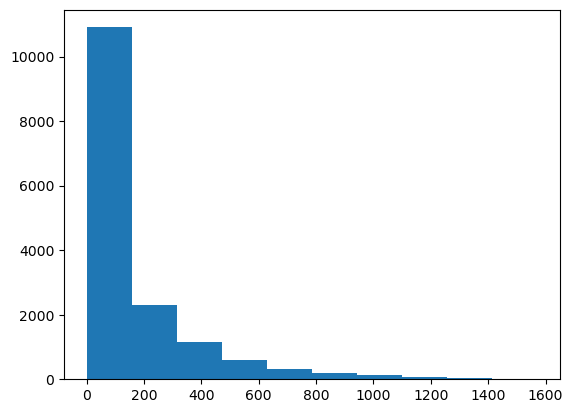

In [42]:
plt.hist(СанктПетербург_data['days_exposition'])

In [43]:
СанктПетербург_data['days_exposition'].mean()

158.57260988486738

По гистограмме мы видим, что в среднем продажа объявлений в Санкт-Петербурге занимает в промежутке от 100 до 180 дней, так как этот промежуток (~ 100-180) встречается в базе данных более 10000 раз, а остальные дни объявлений меньше 2000 раз.

Также с помощью формулы нахождения среднего значения (mean), мы можем посчитать, что в среднем объявления в Санкт-Петербурге активны 159 дней. Следовательно, продажа объявлений в Санкт-Петербурге занимает примерно 159 дней.

## 3.2 Сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)

In [44]:
import numpy as np

In [45]:
min_rooms, max_rooms = СанктПетербург_data['rooms'].min(), СанктПетербург_data['rooms'].max() # Находим минимальное и максимальное значения для столбца rooms

In [46]:
bins_rooms = np.arange(min_rooms, max_rooms + 2, 1) # Создаем интервал для бина с шагом 1

(array([1.100e+02, 4.937e+03, 5.106e+03, 4.123e+03, 9.680e+02, 2.910e+02,
        9.900e+01, 5.700e+01, 1.100e+01, 8.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

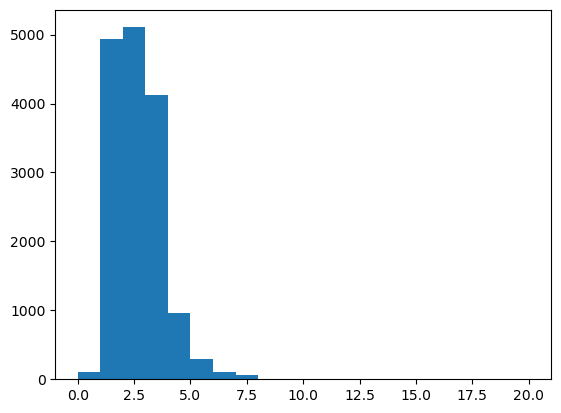

In [47]:
plt.hist(СанктПетербург_data['rooms'], bins = bins_rooms) # Строим гистограмму

In [48]:
from statistics import mode

In [49]:
mode_roomsSP = mode(СанктПетербург_data['rooms']) # находим моду (самое часто встречающееся число) числа среди комнат в Санкт-Петербурге

In [50]:
print(f"Мода: {mode_roomsSP}")

Мода: 2


Исходя из графика и подсчетов выше, можем сделать вывод, что в объявлениях наиболее часто встречаются двухкомнатные недвижимости. Всего объявлений, где количество комнат равно 2, встречается более 5000 раз. Также, наиболее часто после двухкомнатных, встречаются недвижимости с 1 и далее с 3 комнатами, где однокомнатных чуть меньше 5000 и трехкомнатных чуть больше 4000. Вывод такой, что в квартирах Санкт-Петербурга обычно от 1 до 3 комнат.

## 3.3 Распределение высоты потолков в Санкт-Петербурге

(array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 3.1000e+01,
        1.3375e+04, 1.9320e+03, 2.9200e+02, 5.5000e+01, 1.0000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

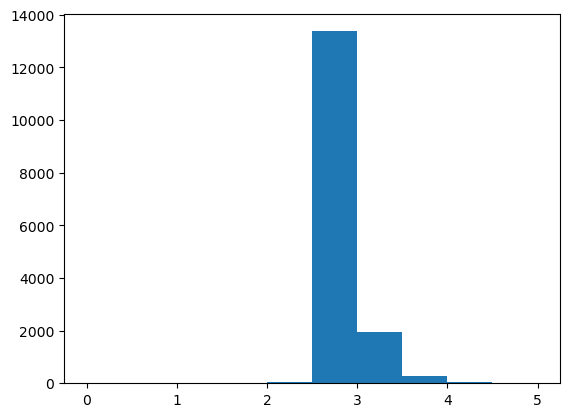

In [51]:
plt.hist(СанктПетербург_data['ceiling_height'], range = (0,5))

Чаще всего в Санкт-Петербурге встречаются недвижимости с высотой потолков от 2.5 до 3. Недвижимости с высотой  потолков в данном промежутке встречаются чуть больше 13000 раз. Меньше всего объявлений, где высота потолков от 2 до 2.5. 

# 4. Такие же гистограммы по второму по дороговизне городу 

In [52]:
data.groupby('locality_name').agg({'last_price':'sum'}).reset_index().sort_values(by = 'last_price', ascending = False)

,locality_name,last_price
19,Санкт-Петербург,1.267507e+11
18,Пушкин,2.387074e+09
32,посёлок Мурино,1.916810e+09
34,посёлок Шушары,1.807556e+09
1,Всеволожск,1.508049e+09
33,посёлок Парголово,1.467600e+09
7,Колпино,1.339839e+09
27,деревня Кудрово,1.266013e+09
21,Сестрорецк,1.160535e+09
3,Гатчина,1.070919e+09


Второй город по дороговизне среди объявлений - это Пушкин

### Выделяем только данные по городу Пушкин

In [53]:
Пушкин_data = data[data['locality_name'] == 'Пушкин']

In [54]:
Пушкин_data

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
17081,Пушкин,369,1,4400000.0,36.0,2016-06-23,1,2.65,6.0,17.0,...,8.0,0,20782.0,30759.0,0.0,0.0,1.0,96.0,203,0.122222
17082,Пушкин,369,8,4170000.0,44.0,2017-12-13,1,2.90,6.0,20.8,...,11.7,1,18557.0,30710.0,0.0,0.0,1.0,118.0,74,0.094773
17083,Пушкин,369,1,4500000.0,48.2,2017-11-13,1,2.70,5.0,25.4,...,9.0,1,19841.0,30183.0,1.0,531.0,3.0,330.0,152,0.093361
17084,Пушкин,369,2,7497600.0,62.5,2015-12-08,2,2.65,5.0,35.5,...,9.5,0,14517.0,26670.0,1.0,517.0,0.0,0.0,1048,0.119962
17085,Пушкин,369,10,4050000.0,51.0,2019-04-23,2,2.65,5.0,30.5,...,6.6,0,17974.0,32546.0,1.0,15.0,1.0,659.0,0,0.079412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17445,Пушкин,369,7,5500000.0,57.0,2016-05-07,3,2.50,5.0,36.6,...,5.0,0,17236.0,29389.0,1.0,245.0,1.0,928.0,397,0.096491
17446,Пушкин,369,9,4550000.0,48.0,2017-06-02,2,2.65,9.0,29.5,...,6.5,2,18846.0,33701.0,1.0,226.0,0.0,0.0,190,0.094792
17447,Пушкин,369,0,4600000.0,55.0,2017-01-23,3,2.65,4.0,41.0,...,5.0,0,14679.0,26833.0,1.0,609.0,0.0,0.0,172,0.083636
17448,Пушкин,369,7,4500000.0,44.0,2018-03-03,1,2.65,5.0,23.0,...,11.0,0,20028.0,32182.0,0.0,0.0,0.0,0.0,168,0.102273


В городе Пушкин всего 369 объявлений.

## 4.1 Сколько примерно дней занимает продажа объявлений в городе Пушкин?

(array([227.,  78.,  31.,  13.,   7.,   3.,   5.,   2.,   0.,   3.]),
 array([   0. ,  151.2,  302.4,  453.6,  604.8,  756. ,  907.2, 1058.4,
        1209.6, 1360.8, 1512. ]),
 <BarContainer object of 10 artists>)

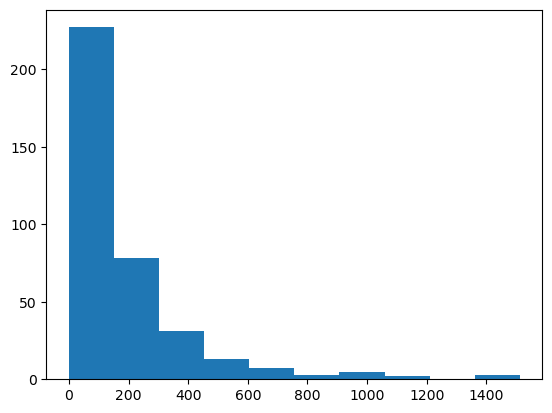

In [55]:
plt.hist(Пушкин_data['days_exposition'])

In [56]:
Пушкин_data['days_exposition'].mean()

174.3658536585366

По гистограмме мы видим, что в среднем продажа объявлений в городе Пушкин занимает в промежутке от 150 до 180 дней, так как этот промежуток (~ 150-180) встречается в базе данных более 200 раз, а остальные дни объявлений меньше 70 раз.

Также с помощью формулы нахождения среднего значения (mean), мы можем посчитать, что в среднем объявления в Пушкине активны 174 дня. Следовательно, продажа объявлений в Пушкине занимает примерно 174 дней.

## 4.2 Сколько обычно комнат в квартирах в Пушкине (Часто встречающиеся значения)

In [57]:
min_rooms, max_rooms = Пушкин_data['rooms'].min(), Пушкин_data['rooms'].max() # Находим минимальное и максимальное значения для столбца rooms

In [58]:
bins_rooms = np.arange(min_rooms, max_rooms + 2, 1) # Создаем интервал для бина с шагом 1

(array([4937., 5106., 4123.,  968.,  291.,   99.,   68.]),
 array([1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 7 artists>)

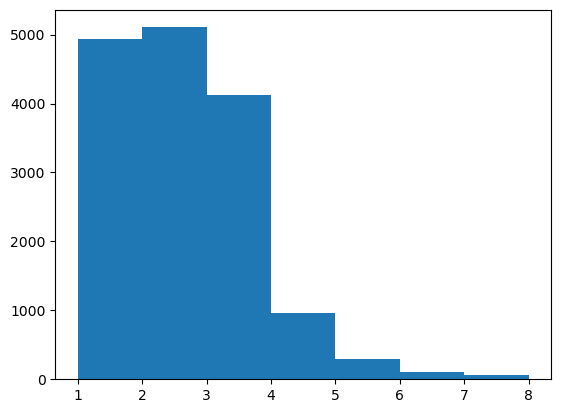

In [59]:
plt.hist(СанктПетербург_data['rooms'], bins = bins_rooms) # Строим гистограмму

In [60]:
mode_roomsP = mode(Пушкин_data['rooms']) # находим моду (самое часто встречающееся число) числа среди комнат в Санкт-Петербурге

In [61]:
print(f"Мода: {mode_roomsSP}")

Мода: 2


Исходя из графика, можем сделать вывод, что в объявлениях наиболее часто встречаются двухкомнатные недвижимости. Также этот аргумент может быть подтвержден формулой нахождения моды (самое часто встречаемое число). Всего объявлений, где количество комнат равно 2, встречается более 5000 раз. Также, наиболее часто после двухкомнатных, встречаются недвижимости с 1 и далее с 3 комнатами, где однокомнатных чуть меньше 5000 и трехкомнатных примерно 4000. Вывод такой, что в квартирах Пушкина обычно от 1 до 3 комнат. 

## 4.3 Распределение высоты потолков в Пушкине

(array([  0.,   0.,   0.,   0.,   3., 325.,  31.,   8.,   2.,   0.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

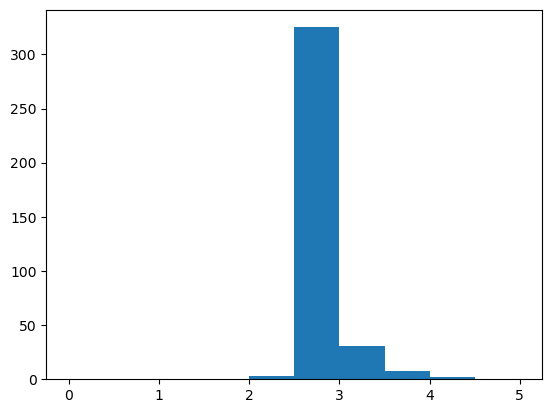

In [62]:
plt.hist(Пушкин_data['ceiling_height'], range = (0,5))

Чаще всего в городе Пушкин встречаются недвижимости с высотой потолков от 2.5 до 3. Недвижимости с высотой  потолков в данном промежутке встречаются больше 300, но меньше 400 раз. Меньше всего объявлений, где высота потолков от 4 до 4.5. 

# 5.  Комменатрии по данным из Санкт Петербурга и выбранному городу (Пушкин)

In [63]:
(СанктПетербург_data['last_price']).mean() # Средняя цена за недвижимость в Санкт-Петербурге

8062507.068634311

In [64]:
(Пушкин_data['last_price']).mean()# Средняя цена за недвижимость в Пушкине

6469035.945799458

Недвижимость в Санкт-Петербурге дороже, чем в Пушкине в среднем на 1.6млн. В Санкт-Петербурге (15721) больше объявлений о продаже недвижимости, чем в городе Пушкин (369). Несмотря на то, что объявлений в Санкт-Петербурге почти в 43 раза больше, чем во втором городе, в Санкт-Петербурге (159) продажа объявлений занимает примерно на 2 недели меньше, чем в Пушкине (174), то есть мы можем сделать вывод, что спрос на недвижимость в Санкт-Петербурге выше, чем в Пушкине. В обоих городах наиболее популярные недвижимости имеют две комнаты и высоту потолков от 2.5 до 3.

## 6. В каком из двух городов квартиры продаются быстрее и в каком из всех городов идет наименьшая средняя продолжительность продажи квартиры?

In [65]:
data.groupby('locality_name').agg({'days_exposition':'mean'}).reset_index().sort_values(by = 'days_exposition', ascending = True)

,locality_name,days_exposition
23,Сосновый Бор,84.712644
5,Кириши,92.464000
11,Кудрово,94.849711
13,Луга,97.732143
26,городской посёлок Янино-1,99.918033
30,посёлок Бугры,108.623188
0,Волхов,116.702703
4,Кингисепп,117.884615
7,Колпино,130.855030
22,Сланцы,135.741071


Сравнивая Санкт-Петербург и Пушкин, можно увидеть, что в Санкт-Петербурге квартиры продаются быстрее, чем в Пушкине примерно на 2 недели (или 15 дней).

Наименьшая средняя продолжительность продажи квартир в локации под названием "Сосновый Бор". Квартиры в данной местности продаются в среднем за ~85 дней.

# 7. Создание отдельного столбца, где содержится разметка того, находится ли недвижимость на последнем этаже или нет.

In [104]:
data['last_floor'] = data.apply(lambda row: 'True' if row['floor'] == row['floors_total'] else 'False', axis=1)

In [105]:
data

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,last_floor
0,Санкт-Петербург,15721,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,...,0,18863.0,16028.0,1.0,482.0,2.0,755.0,0,0.120370,False
1,Санкт-Петербург,15721,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,...,0,21741.0,13933.0,1.0,90.0,2.0,574.0,558,0.092786,False
2,Санкт-Петербург,15721,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,0.0,...,0,28098.0,6800.0,2.0,84.0,3.0,234.0,424,0.408176,False
3,Санкт-Петербург,15721,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,...,0,31856.0,8098.0,2.0,112.0,1.0,48.0,121,0.100000,False
4,Санкт-Петербург,15721,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,0.0,...,2,23982.0,11634.0,0.0,0.0,0.0,0.0,0,0.110545,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,56,1,1930000.0,47.0,2018-04-06,1,2.65,9.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,0.041064,False
21632,Луга,56,15,1800000.0,36.0,2016-05-18,1,2.65,5.0,28.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,170,0.050000,False
21633,Луга,56,10,2900000.0,63.0,2018-07-12,3,2.50,5.0,46.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,70,0.046032,False
21634,Луга,56,9,1950000.0,44.2,2019-04-08,2,2.50,5.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.044118,False


In [106]:
data['last_floor'].unique()

array(['False', 'True'], dtype=object)

Добавлена колонка, которая называется "last_floor". Данная колонка показывает "True", если этаж данной недвижимости (колонка "floor") равен этажу из колонки "floor_total" и "False", если эти две колонки не равны. 

# 8.  Анализ количества комнат по квартирам расположенным на последнем этаже


In [107]:
last_floor_apartment = data[data['last_floor'] == 'True'] # Оставляем только данные квартир, расположенных на последнем этаже

In [112]:
last_floor_apartment

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,last_floor
13,Санкт-Петербург,15721,11,2950000.0,32.0,2016-10-29,1,2.60,9.0,17.7,...,0,15414.0,14211.0,2.0,517.0,1.0,190.0,615,0.092188,True
23,Санкт-Петербург,15721,13,3790000.0,45.0,2017-01-25,2,2.65,9.0,27.0,...,2,49574.0,16461.0,1.0,459.0,0.0,0.0,139,0.084222,True
26,Санкт-Петербург,15721,13,9330000.0,48.0,2017-01-10,2,3.00,4.0,28.0,...,0,15016.0,10822.0,0.0,0.0,1.0,492.0,763,0.194375,True
33,Санкт-Петербург,15721,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.0,...,1,16510.0,6582.0,1.0,526.0,0.0,0.0,0,0.086728,True
38,Санкт-Петербург,15721,15,6300000.0,46.5,2017-03-06,1,2.65,13.0,0.0,...,0,11125.0,14501.0,0.0,0.0,0.0,0.0,336,0.135484,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,Луга,56,14,2400000.0,61.0,2018-03-21,4,2.50,5.0,48.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,281,0.039344,True
21619,Луга,56,9,1100000.0,34.0,2018-01-15,1,2.50,2.0,24.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,51,0.032353,True
21623,Луга,56,0,1650000.0,33.5,2018-07-03,1,2.80,5.0,0.0,...,4,0.0,0.0,0.0,0.0,0.0,0.0,7,0.049254,True
21625,Луга,56,5,1650000.0,32.0,2018-10-09,1,2.50,4.0,20.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.051562,True


In [113]:
selected_columns = ['locality_name', 'rooms', 'last_floor']

In [115]:
result_last_floor_apartment= last_floor_apartment[selected_columns]

In [116]:
result_last_floor_apartment

,locality_name,rooms,last_floor
13,Санкт-Петербург,1,True
23,Санкт-Петербург,2,True
26,Санкт-Петербург,2,True
33,Санкт-Петербург,6,True
38,Санкт-Петербург,1,True
...,...,...,...
21610,Луга,4,True
21619,Луга,1,True
21623,Луга,1,True
21625,Луга,1,True


In [117]:
mode_roomsLF = mode(result_last_floor_apartment['rooms'])

In [118]:
print(f"Мода: {mode_roomsLF}")

Мода: 2


Всего квартир, расположенных на последних этажах, 2855. В таблице выше показано количество комнат в квартирах, расположенных на последних этажах. В основном встречаются двухкомнатные квартиры.

# 9. Средняя цена квартир расположенных на последнем этаже


In [119]:
average_price_last_floor = last_floor_apartment['last_price'].mean()

In [120]:
average_price_last_floor

8174830.474956217

Средняя цена квартир расположенных на последнем этаже равна ~8174831. 

# 10.  Результат проделанной работы


В данной работе использовались все основные методы для анализа данных рынка недвижимости. В процессе работы применялись такие функции как нахождение среднего, подсчет общего количества, то есть нахождение суммы, исследование только определенного города, в нашем случае Санкт-Петербург и Пушкин. Для этого использовались коды по вычислению наименьшего и наибольшего значения из определенной категории, методы группировки и сортировка данных. Также, помимо различных вычеслений, мы строили графики, которые также помогают в анализе и визуально демонстрируют нужные значения, такие как, например, какая высота квартир чаще всего встречается. В работе мы сравнивали квартиры в разных городах, цены на квартиры, продаваемость квартир.

Проанализировав ранок недвижимости, можно сделать вывод, что рынок недвижимости часто характеризуется различными параметрами, такими как количество комнат, этаж, цена, квадратура, высота потолков, наличие балкона и тд. Также, стоит подчеркнуть, что независимо от локации, самые популярные квартиры это двухкомнатные с высотой потолков от 2.5 до 3.

# 11. Предложение, в каком городе лучше всего будет брать квартиру, помимо Санкт Петербурга, для дальнейшей перепродажи и сколько комнат лучше брать, чтобы произвести продажу быстрее?

In [126]:
data[data['locality_name'] == 'Кронштадт']

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,last_floor
20668,Кронштадт,96,10,4500000.0,55.0,2018-12-09,2,2.70,3.0,35.5,...,1,68258.0,49984.0,3.0,167.0,3.0,118.0,141,0.081818,False
20669,Кронштадт,96,11,2500000.0,30.9,2017-10-20,1,2.75,5.0,16.7,...,0,68997.0,50722.0,1.0,285.0,2.0,221.0,360,0.080906,False
20670,Кронштадт,96,9,4640000.0,64.0,2018-03-06,3,2.50,9.0,42.0,...,0,65192.0,46918.0,1.0,464.0,1.0,422.0,139,0.072500,False
20671,Кронштадт,96,6,2750000.0,36.0,2017-04-18,1,2.65,5.0,20.5,...,4,69785.0,51511.0,2.0,52.0,3.0,313.0,381,0.076389,True
20672,Кронштадт,96,9,8200000.0,96.0,2018-07-23,3,3.62,3.0,61.6,...,0,69690.0,51415.0,3.0,87.0,3.0,412.0,0,0.085417,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20759,Кронштадт,96,13,2500000.0,53.6,2017-11-10,2,2.65,9.0,33.9,...,0,65546.0,47272.0,0.0,0.0,0.0,0.0,74,0.046642,False
20760,Кронштадт,96,3,4800000.0,63.8,2017-07-18,3,2.65,12.0,38.9,...,0,65328.0,47054.0,1.0,173.0,1.0,936.0,55,0.075235,False
20761,Кронштадт,96,6,4400000.0,80.0,2017-10-07,2,3.00,4.0,48.0,...,1,69449.0,51175.0,2.0,433.0,3.0,448.0,44,0.055000,True
20762,Кронштадт,96,0,3465000.0,46.9,2015-08-01,2,2.65,4.0,29.7,...,0,69619.0,51345.0,3.0,59.0,3.0,170.0,335,0.073881,True


In [127]:
data[data['locality_name'] == 'Пушкин']

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,last_floor
17081,Пушкин,369,1,4400000.0,36.0,2016-06-23,1,2.65,6.0,17.0,...,0,20782.0,30759.0,0.0,0.0,1.0,96.0,203,0.122222,False
17082,Пушкин,369,8,4170000.0,44.0,2017-12-13,1,2.90,6.0,20.8,...,1,18557.0,30710.0,0.0,0.0,1.0,118.0,74,0.094773,False
17083,Пушкин,369,1,4500000.0,48.2,2017-11-13,1,2.70,5.0,25.4,...,1,19841.0,30183.0,1.0,531.0,3.0,330.0,152,0.093361,False
17084,Пушкин,369,2,7497600.0,62.5,2015-12-08,2,2.65,5.0,35.5,...,0,14517.0,26670.0,1.0,517.0,0.0,0.0,1048,0.119962,True
17085,Пушкин,369,10,4050000.0,51.0,2019-04-23,2,2.65,5.0,30.5,...,0,17974.0,32546.0,1.0,15.0,1.0,659.0,0,0.079412,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17445,Пушкин,369,7,5500000.0,57.0,2016-05-07,3,2.50,5.0,36.6,...,0,17236.0,29389.0,1.0,245.0,1.0,928.0,397,0.096491,True
17446,Пушкин,369,9,4550000.0,48.0,2017-06-02,2,2.65,9.0,29.5,...,2,18846.0,33701.0,1.0,226.0,0.0,0.0,190,0.094792,False
17447,Пушкин,369,0,4600000.0,55.0,2017-01-23,3,2.65,4.0,41.0,...,0,14679.0,26833.0,1.0,609.0,0.0,0.0,172,0.083636,True
17448,Пушкин,369,7,4500000.0,44.0,2018-03-03,1,2.65,5.0,23.0,...,0,20028.0,32182.0,0.0,0.0,0.0,0.0,168,0.102273,False


In [142]:
data[data['locality_name'] == 'Колпино']

,locality_name,number_of_posts,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,last_floor
17450,Колпино,338,8,4800000.0,73.0,2018-10-15,4,2.65,9.0,51.6,...,0,26535.0,32321.0,0.0,0.0,0.0,0.0,92,0.065753,False
17451,Колпино,338,3,2350000.0,34.0,2018-06-14,1,2.50,9.0,19.0,...,0,26765.0,32551.0,1.0,445.0,1.0,996.0,121,0.069118,False
17452,Колпино,338,0,4000000.0,60.0,2019-03-12,2,3.40,3.0,37.8,...,0,25670.0,31456.0,3.0,370.0,3.0,534.0,45,0.066667,False
17453,Колпино,338,7,3700000.0,47.0,2018-09-12,2,2.65,9.0,29.0,...,0,25316.0,31102.0,1.0,50.0,0.0,0.0,7,0.078723,False
17454,Колпино,338,20,4400000.0,58.5,2017-12-08,2,2.65,24.0,29.1,...,0,28554.0,34341.0,0.0,0.0,3.0,287.0,490,0.075214,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17783,Колпино,338,16,4100000.0,64.0,2017-12-06,2,2.65,17.0,34.0,...,2,28369.0,34156.0,0.0,0.0,3.0,501.0,48,0.064062,False
17784,Колпино,338,3,3100000.0,30.0,2018-03-28,1,2.50,5.0,17.0,...,0,24056.0,29843.0,0.0,0.0,0.0,0.0,10,0.103333,True
17785,Колпино,338,14,5950000.0,80.3,2018-07-03,3,2.70,12.0,0.0,...,0,27933.0,33719.0,0.0,0.0,2.0,562.0,60,0.074097,False
17786,Колпино,338,13,2600000.0,32.0,2017-07-12,1,2.65,5.0,18.0,...,0,26074.0,31861.0,2.0,231.0,2.0,371.0,195,0.081250,False


Критерии, по- моему мнению, которые важны для максимизации потенциальной прибыли при перепродаже квартиры - это местоположение и инфраструктура локации, где находится недвижимость. Исходя из анализа рынка, квартиры с двумя комнатами чаще всего привлекают внимание покупателей, что может способствовать более быстрой и успешной продаже. Рекомендуется также учитывать факторы, такие как инфраструктура и общая популярность района при принятии решения о покупке квартиры для последующей перепродажи. Чем больше различных объектов благоприятно влияющие на пребывание человека в данном месте, тем выше спрос на эту недвижимость, то есть в будущем легче препродать и получить прибыль. В нашем случае, наличие парков и пруда это плюс при покупке недвижимости, так как есть где отдохнуть и расслабиться. Также, я считаю, что наличие балкона тоже только в плюс, так как человек может "выйти на улицу", не выходя из квартиры. Если говорить про транспортные узлы, то в нашем случае у нас есть данные по аэропорту. Иметь квартиру недалеко от аэропорта в некоторых случаях выгодно, так как не тратишь много времени на дорогу и денег на проезд. Еще одним важным критерием являет продаваемость и цена на недвижимость.

Проанализировав недвижимости в различных городах, поселках России, я могу сказать, что помимо Санкт-Петербурга есть как минимум три города - Пушкин, Колпино, Кронштадт, которые соответсуют всем критериям и условиям прописанным выше. Недвижимости в этих городах продаются относительно быстро  (152, 131 и 174 дня). Cтоимость квартир в этих городах также относительно дешевле, чем ,например, в Санкт-Петербурге.

Для группы покупателей, нацеленных купить недвижимость в России, в качестве выгодной покупки для дальнейшей перепродажи, я бы посоветовала недвижимости в городах Пушкин, Колпино и Кронштадт.